In [14]:
# Đỗ Ngọc Lâm - B22DCCN476
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:

#---check for null values--
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:

print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [17]:

columns_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

In [18]:

df.fillna(df.mean(numeric_only=True), inplace=True)
print("Data after filling NaN values:")
print(df.isnull().sum())

Data after filling NaN values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [19]:

print("Remaining zeros after processing:")
print(df.eq(0).sum())
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())

Remaining zeros after processing:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Data types:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3 

In [20]:

# Reload and clean the data properly
df = pd.read_csv('diabetes.csv')

# Replace 0 values with NaN for specific columns (excluding Pregnancies and Outcome)
columns_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

# Fill NaN values with the mean of each column
df.fillna(df.mean(numeric_only=True), inplace=True)

# Now calculate correlation
corr = df.corr()
print(corr)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

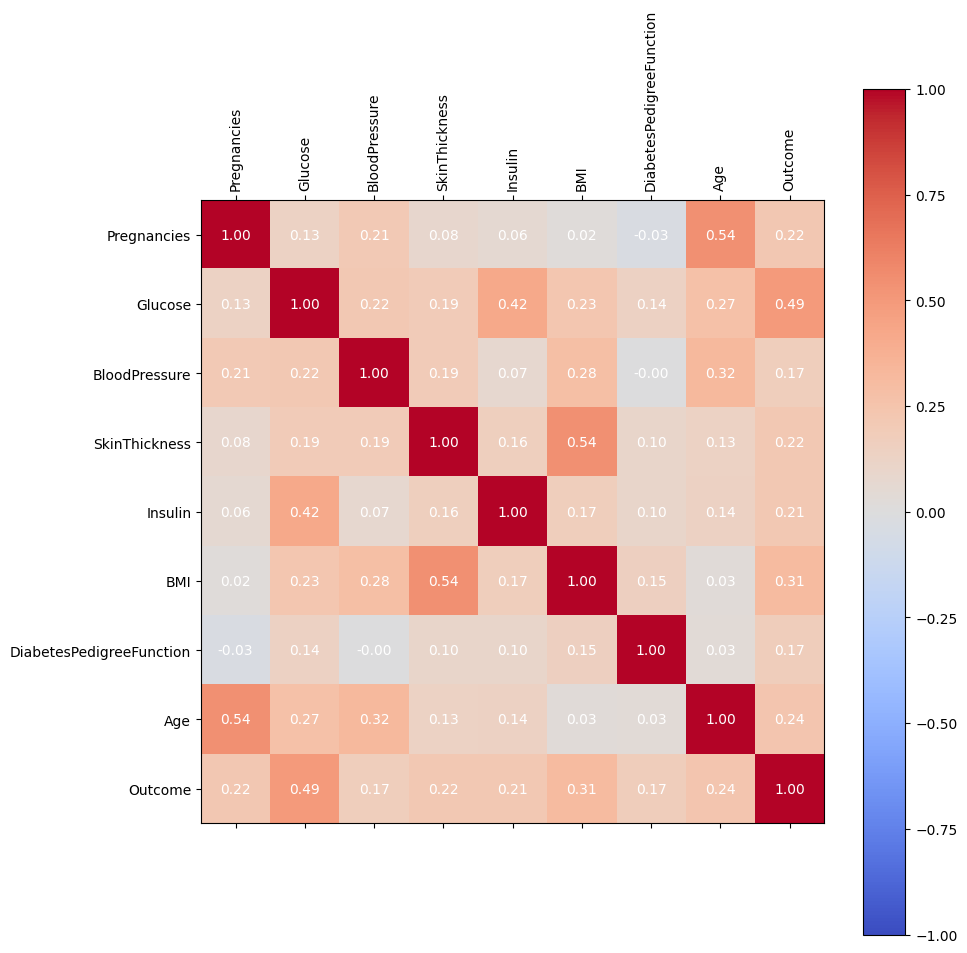

In [21]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Nếu chưa có:
# corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# số biến = số cột trong ma trận tương quan
n = corr.shape[0]
ticks = np.arange(n)

# set ticks trước, rồi set ticklabels (tránh warning)
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90)

ax.set_yticks(ticks)
ax.set_yticklabels(corr.index)

# --- in hệ số tương quan ---
for i in range(n):
    for j in range(n):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha="center", va="center", color="w")

plt.tight_layout()
plt.show()


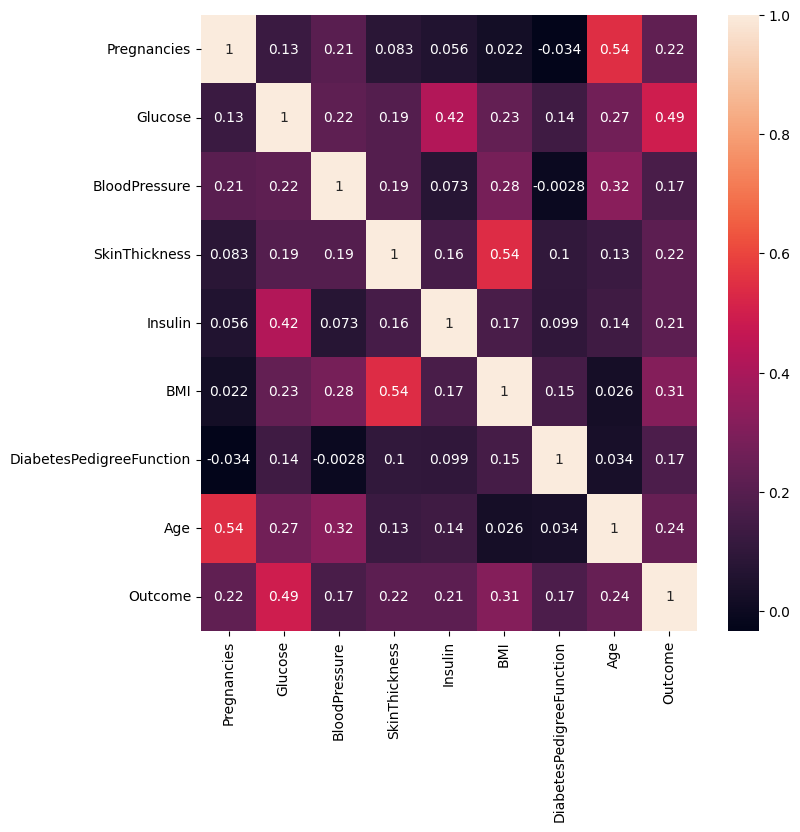

In [22]:

import seaborn as sns
sns.heatmap(df.corr(),annot=True)
 #---get a reference to the current figure and set its size--
fig = plt.gcf()
fig.set_size_inches(8,8)

In [23]:

print(df.corr().nlargest(4, 'Outcome').index)

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


In [24]:

#---print the top 4 correlation values--
print(df.corr().nlargest(4, 'Outcome').values[:,8])


[1.         0.49292767 0.31192439 0.23835598]
